# Project 7: Predictive ML (Simple Linear Regression)

**Author:** Abdelhafidh Mahouel  
**Repo:** https://github.com/AbdelhafidhMahouel/datafun-07-ml  

This notebook follows Deitel:
- **10.16** Intro to Data Science: *Time Series and Simple Linear Regression*  
- **15.4** Case Study: *Time Series and Simple Linear Regression*  
- **15.5** Bonus: *California Housing Dataset* (multiple models)


In [22]:
# Imports (keep near the top, per course conventions)
import os
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Display settings (optional but helpful for readability)
pd.set_option("display.max_columns", 50)
pd.set_option("display.precision", 2)

print("Ready.")


Ready.


## Part 1 - Chart a Straight Line (Celsius vs Fahrenheit)

We create a small table of Celsius values and convert to Fahrenheit, then visualize the relationship and a best-fit line.

In [23]:
# Create a simple Celsius -> Fahrenheit dataset
celsius = np.arange(-40, 101, 10)  # -40 to 100 by 10s
fahrenheit = (celsius * 9/5) + 32

cf_df = pd.DataFrame({"Celsius": celsius, "Fahrenheit": fahrenheit})
cf_df.head(), cf_df.tail()


(   Celsius  Fahrenheit
 0      -40       -40.0
 1      -30       -22.0
 2      -20        -4.0
 3      -10        14.0
 4        0        32.0,
     Celsius  Fahrenheit
 10       60       140.0
 11       70       158.0
 12       80       176.0
 13       90       194.0
 14      100       212.0)

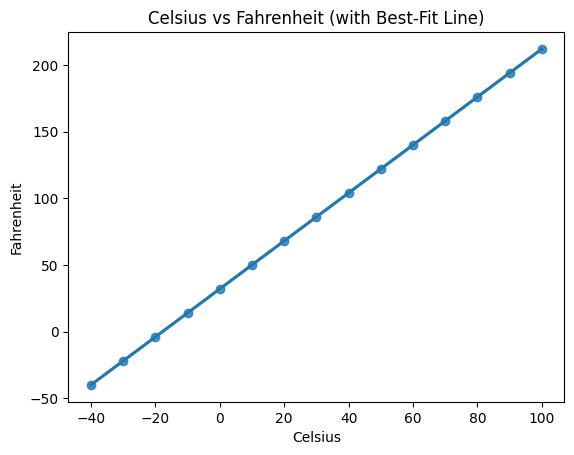

LinregressResult(slope=np.float64(1.7999999999999998), intercept=np.float64(32.00000000000001), rvalue=np.float64(1.0), pvalue=np.float64(1.964806196992084e-129), stderr=np.float64(0.0), intercept_stderr=np.float64(0.0))

In [24]:
# Scatter + regression line
sns.regplot(data=cf_df, x="Celsius", y="Fahrenheit")
plt.title("Celsius vs Fahrenheit (with Best-Fit Line)")
plt.show()

# Compute slope/intercept with SciPy just to confirm
lin = stats.linregress(cf_df["Celsius"], cf_df["Fahrenheit"])
lin


## Part 2 - Prediction (SciPy stats.linregress)

We use NYC **January average high temperatures** (1895–2018) from:

- `ave_hi_nyc_jan_1895-2018.csv` (provided with the book examples)

If the CSV is not in your project folder, this notebook will download it from the Deitel GitHub repo.


### Section 1 - Data Acquisition

In [25]:
# Load the NYC January average high temperature data
# Expected columns: Date, Value, Anomaly
csv_name = "ave_hi_nyc_jan_1895-2018.csv"
local_path = os.path.join("data", csv_name)

if not os.path.exists(local_path):
    os.makedirs("data", exist_ok=True)
    url = "https://raw.githubusercontent.com/pdeitel/IntroToPython/master/examples/ch10/ave_hi_nyc_jan_1895-2018.csv"
    print("Downloading:", url)
    nyc_df = pd.read_csv(url)
    nyc_df.to_csv(local_path, index=False)
else:
    nyc_df = pd.read_csv(local_path)

nyc_df.head()


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 - Data Inspection

In [26]:
# Data inspection
display(nyc_df.head())
display(nyc_df.tail())
print(nyc_df.dtypes)



,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


Date         int64
Value      float64
Anomaly    float64
dtype: object


### Section 3 - Data Cleaning

In [27]:
# Feature engineering: Extract 4-digit Year from the Date column (YYYYMM like 189501)
# Keep only the first 4 characters, then convert to int.
nyc_df["Year"] = nyc_df["Date"].astype(str).str[:4].astype(int)

# Rename Value for clarity
nyc_df = nyc_df.rename(columns={"Value": "AvgHighTempF"})

# Keep only needed columns
nyc_df = nyc_df[["Year", "AvgHighTempF"]].copy()

nyc_df.head()


,Year,AvgHighTempF
0,1895,34.2
1,1896,34.7
2,1897,35.5
3,1898,39.6
4,1899,36.4


### Section 4 - Descriptive Statistics

In [28]:
# Descriptive statistics
nyc_df.describe()


,Year,AvgHighTempF
count,124.00,124.00
mean,1956.50,37.60
std,35.94,4.54
min,1895.00,26.10
25%,1925.75,34.58
50%,1956.50,37.60
75%,1987.25,40.60
max,2018.00,47.60


### Section 5 - Build the Model

In [29]:
# Build model with SciPy stats.linregress: y = m*x + b
linear_regression = stats.linregress(x=nyc_df["Year"], y=nyc_df["AvgHighTempF"])
linear_regression


LinregressResult(slope=np.float64(0.014771361132966163), intercept=np.float64(8.694993233674289), rvalue=np.float64(0.1169376670075292), pvalue=np.float64(0.19586679787456185), stderr=np.float64(0.011357855112603288), intercept_stderr=np.float64(22.22536216679513))

### Section 6 - Predict

In [30]:
# Predict for 2024 (as required by the course instructions)
pred_2024_part2 = linear_regression.slope * 2024 + linear_regression.intercept
pred_2024_part2


np.float64(38.5922281667978)

### Section 7 - Visualizations

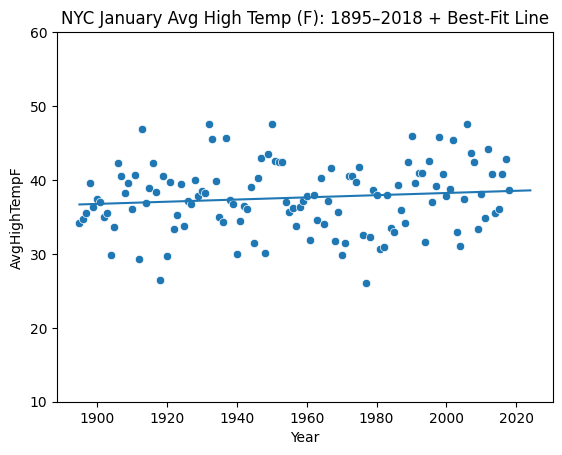

In [31]:
# Visualization (scatter + best-fit line)
sns.scatterplot(data=nyc_df, x="Year", y="AvgHighTempF")

# Best-fit line points
x_vals = np.array([nyc_df["Year"].min(), 2024])
y_vals = linear_regression.slope * x_vals + linear_regression.intercept
plt.plot(x_vals, y_vals)

plt.title("NYC January Avg High Temp (F): 1895–2018 + Best-Fit Line")
plt.ylim(10, 60)  # common y-scale used in the text
plt.show()


## Part 3 - Prediction (scikit-learn LinearRegression + train/test split)

Now we repeat the NYC prediction using scikit-learn and evaluate the model on a test set.


### Section 1 - Data Acquisition

In [ ]:
# Prepare X and y
X = nyc_df[["Year"]]  # 2D for scikit-learn
y = nyc_df["AvgHighTempF"]



Train shape: (99, 1) (99,)
Test shape : (25, 1) (25,)
coef_ (slope): 0.014710558995821564
intercept_   : 8.891970558021107


### Section 5 - Build the Model

In [ ]:
# Train/test split (random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape :", X_test.shape, y_test.shape)

# Train model
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)

print("coef_ (slope):", sk_model.coef_[0])
print("intercept_   :", sk_model.intercept_)

### Section 6 - Predict

In [33]:
# Test model with simple metrics
y_pred_test = sk_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print("MAE :", mae)
print("RMSE:", rmse)
print("R^2 :", r2)


MAE : 3.242305973528082
RMSE: 4.012618680107363
R^2 : 0.0032988738704902154


In [34]:
# Predict for 2024
future_df = pd.DataFrame({"Year": [2024]})
pred_2024_part3 = sk_model.predict(future_df)[0]
pred_2024_part3


np.float64(38.66614196556395)

### Section 7 - Visualizations

c:\Repos\datafun-07-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


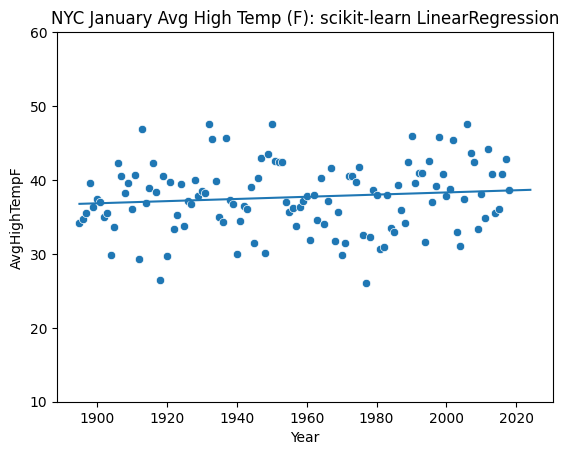

In [35]:
# Visualization (scatter + best-fit line using sklearn model)
sns.scatterplot(data=nyc_df, x="Year", y="AvgHighTempF")

x_vals = np.array([nyc_df["Year"].min(), 2024]).reshape(-1, 1)
y_vals = sk_model.predict(x_vals)
plt.plot(x_vals, y_vals)

plt.title("NYC January Avg High Temp (F): scikit-learn LinearRegression")
plt.ylim(10, 60)
plt.show()


## Part 4 - Insights (Compare Part 2 vs Part 3)

**My observations:**
- Both methods create a straight-line model, but Part 3 (scikit-learn) also supports train/test splitting and metrics.
- If Part 2 and Part 3 predictions differ, that is expected because Part 3 trains on a subset of the data.
- Using evaluation metrics (MAE, RMSE, R²) helps judge whether the model is actually useful.


In [36]:
print("Part 2 prediction for 2024 (SciPy):", pred_2024_part2)
print("Part 3 prediction for 2024 (sklearn):", pred_2024_part3)
print("Difference:", pred_2024_part3 - pred_2024_part2)


Part 2 prediction for 2024 (SciPy): 38.5922281667978
Part 3 prediction for 2024 (sklearn): 38.66614196556395
Difference: 0.07391379876614934


## Part 5 - Bonus (15.5): California Housing Dataset

We practice more ML skills using the California Housing dataset:
- Load dataset
- Split into train/test
- Train multiple models
- Compare results and pick the best


### Section 1 - Data Acquisition

In [37]:
# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
housing_df = housing.frame

housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42


### Section 4 - Descriptive Statistics

In [38]:
# Quick inspection
display(housing_df.describe())

# Features and target
X = housing_df.drop(columns=["MedHouseVal"])
y = housing_df["MedHouseVal"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)

X_train.shape, X_test.shape


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


((16512, 8), (4128, 8))

### Section 5 - Build the Model

In [39]:
# Train and compare several models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=11),
    "Lasso": Lasso(alpha=0.001, random_state=11, max_iter=10000),
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=11, max_iter=10000),
}

rows = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rows.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": math.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds),
    })

results_df = pd.DataFrame(rows).sort_values(by="RMSE")
results_df


,Model,MAE,RMSE,R2
0,LinearRegression,0.54,0.73,0.61
1,Ridge,0.54,0.73,0.61
3,ElasticNet,0.54,0.73,0.61
2,Lasso,0.54,0.73,0.61


### Section 6 - Predict

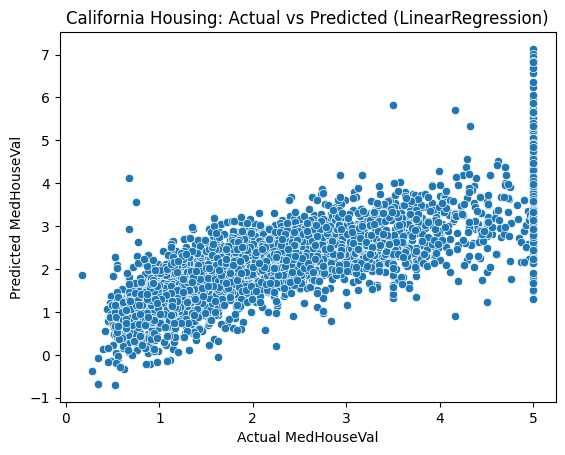

Best model: LinearRegression
Model    LinearRegression
MAE                  0.54
RMSE                 0.73
R2                   0.61
Name: 0, dtype: object


In [40]:
# Plot predicted vs actual for the best model (lowest RMSE)
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

preds = best_model.predict(X_test)

sns.scatterplot(x=y_test, y=preds)
plt.title(f"California Housing: Actual vs Predicted ({best_model_name})")
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.show()

print("Best model:", best_model_name)
print(results_df.iloc[0])
